# Predicting and Traffic of Congestion Charge Zone in Greater London Area based on Public Transport Journeys

The purpose of this research is to determine if the Public Transport Journey Types can affect the Number of Confirmed Vehicles during Charging Hours in The Congestion Charge Zone.
Multiple Machine Learning Models will be trained on 2 datasets, namely the **Public Transport Journeys by Type of Transport** and **Vehicles Entering C-Charge Zone in Greater London Area** provided by _Transport for London (TfL)_ from London Datastore.

This research will follow the KDD process of Machine Learning

# Datasets

## Public Transport Journeys Type
source: https://data.london.gov.uk/dataset/public-transport-journeys-type-transport

In [462]:
import pandas as pd
publicTransport = pd.read_csv("tfl-journeys-type.csv")
publicTransport.head()


,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,NaN,NaN,NaN
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,NaN,NaN,NaN
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,NaN,NaN,NaN
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN


## Vehicles Entering C-Charge Zone in Greater London Area
source :https://data.london.gov.uk/dataset/vehicles-entering-c-charge-zone-month

In [463]:
import pandas as pd
traffic = pd.read_csv('tfl-vehicles-c-charge-zone.csv')
traffic.head()

,Month,CC Camera Captures during Charging Hours,CC Confirmed Vehicles observed during Charging Hours,Number of Charging Day in Month,Notes
0,Jul-10,5615063,NaN,22,NaN
1,Aug-10,5174428,NaN,21,30 Aug Non Charging Day
2,Sep-10,6198427,NaN,22,NaN
3,Oct-10,6001932,NaN,21,NaN
4,Nov-10,6430184,NaN,22,NaN


# Data Cleaning

Drop rows before July 2010 of publicTransport dataset

In [464]:
publicTransport_clean = publicTransport.drop([0,1,2])
publicTransport_clean = publicTransport_clean.reset_index().drop(columns=['index'])
publicTransport_clean.head()


,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN
1,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN
2,06_10/11,6,28,22-Aug-10,18-Sep-10,175.8,80.9,5.5,2.0,NaN,NaN,NaN
3,07_10/11,7,28,19-Sep-10,16-Oct-10,189.8,88.7,6.3,2.3,NaN,NaN,NaN
4,08_10/11,8,28,17-Oct-10,13-Nov-10,179.9,90.3,6.7,2.2,5.6,NaN,NaN


In [465]:
publicTransport_clean = publicTransport_clean.fillna(0)
publicTransport_clean.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,0.0,0.0,0.0
1,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,0.0,0.0,0.0
2,06_10/11,6,28,22-Aug-10,18-Sep-10,175.8,80.9,5.5,2.0,0.0,0.0,0.0
3,07_10/11,7,28,19-Sep-10,16-Oct-10,189.8,88.7,6.3,2.3,0.0,0.0,0.0
4,08_10/11,8,28,17-Oct-10,13-Nov-10,179.9,90.3,6.7,2.2,5.6,0.0,0.0


In [466]:
tflJourneys = pd.DataFrame(columns=['Month', 'Bus journeys (m)','Underground journeys (m)','DLR Journeys (m)','Tram Journeys (m)','Overground Journeys (m)','London Cable Car Journeys (m)','TfL Rail Journeys (m)','Total journeys (m)'])
tflJourneys.head()

,Month,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m),Total journeys (m)


In [467]:

for index, row in publicTransport_clean.iterrows():
    if(row['Period beginning'][3:6] != row['Period ending'][3:6]) :
        if(row['Period ending'][3:6] == publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['Period beginning'][3:6]):
            bus = (row['Bus journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['Bus journeys (m)'])/2
            underground = (row['Underground journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['Underground journeys (m)'])/2
            DLR = (row['DLR Journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['DLR Journeys (m)'])/2
            tram = (row['Tram Journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['Tram Journeys (m)'])/2
            overground = (row['Overground Journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['Overground Journeys (m)'])/2
            cable = (row['London Cable Car Journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['London Cable Car Journeys (m)'])/2
            rail = (row['TfL Rail Journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['TfL Rail Journeys (m)'])/2
            total = bus + underground + DLR + tram + overground + cable + rail


            tflJourneys.loc[index] = ({'Month' : row['Period ending'][3:10] , 'Bus journeys (m)': bus, 'Underground journeys (m)' : underground, 'DLR Journeys (m)' : DLR, 'Tram Journeys (m)': tram, 'Overground Journeys (m)': overground, 'London Cable Car Journeys (m)': cable, 'TfL Rail Journeys (m)': rail, 'Total journeys (m)' : total})


In [433]:
tflJourneys

,Month,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m),Total journeys (m)
0,Jul-10,171.90,84.70,5.95,2.05,0.00,0.00,0.00,264.60
1,Aug-10,168.10,81.90,5.65,2.00,0.00,0.00,0.00,257.65
2,Sep-10,182.80,84.80,5.90,2.15,0.00,0.00,0.00,275.65
3,Oct-10,184.85,89.50,6.50,2.25,2.80,0.00,0.00,285.90
4,Nov-10,179.35,90.45,6.55,2.25,5.50,0.00,0.00,284.10
...,...,...,...,...,...,...,...,...,...
164,Mar-23,141.90,87.35,7.70,1.65,13.30,0.10,14.00,266.00
167,May-23,145.90,89.20,7.80,1.65,14.35,0.10,15.55,274.55
168,Jun-23,146.45,92.15,7.90,1.65,14.45,0.10,16.35,279.05
169,Jul-23,138.40,90.35,7.55,1.50,13.35,0.15,16.05,267.35


In [468]:
idx = tflJourneys.loc[tflJourneys['Month']=='Oct-16'].index
tflJourneys = tflJourneys.loc[idx[0]:]
tflJourneys.reset_index(drop=True, inplace=True)
tflJourneys


,Month,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m),Total journeys (m)
0,Oct-16,181.75,111.50,9.85,2.35,15.30,0.10,3.75,324.60
1,Nov-16,179.65,114.65,10.10,2.15,15.55,0.10,3.90,326.10
2,Dec-16,164.25,102.85,8.85,2.10,13.85,0.10,3.65,295.65
3,Jan-17,160.10,95.45,8.60,2.25,13.40,0.10,3.55,283.45
4,Feb-17,173.65,105.10,9.65,2.30,14.70,0.10,3.70,309.20
...,...,...,...,...,...,...,...,...,...
69,Mar-23,141.90,87.35,7.70,1.65,13.30,0.10,14.00,266.00
70,May-23,145.90,89.20,7.80,1.65,14.35,0.10,15.55,274.55
71,Jun-23,146.45,92.15,7.90,1.65,14.45,0.10,16.35,279.05
72,Jul-23,138.40,90.35,7.55,1.50,13.35,0.15,16.05,267.35


In [435]:

traffic.dropna(subset=['CC Confirmed Vehicles observed during Charging Hours'], inplace=True)

numVehicles = traffic.loc[:,['Month','CC Confirmed Vehicles observed during Charging Hours']]
numVehicles.reset_index(drop=True, inplace=True)
numVehicles 


,Month,CC Confirmed Vehicles observed during Charging Hours
0,Oct-16,2283444.0
1,Nov-16,2396023.0
2,Dec-16,1794886.0
3,Jan-17,2119813.0
4,Feb-17,2049863.0
...,...,...
79,May-23,2308362.0
80,Jun-23,2443181.0
81,Jul-23,2316631.0
82,Aug-23,2277610.0


# Data Integration

Joining the public transport journeys dataset with the confirmed ehvicles observed during charging hours in the C-Charge Zone

In [436]:
df = tflJourneys.join(numVehicles.set_index('Month'), on='Month')
df = df.set_index('Month')
df

,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m),Total journeys (m),CC Confirmed Vehicles observed during Charging Hours
Month,,,,,,,,,
Oct-16,181.75,111.50,9.85,2.35,15.30,0.10,3.75,324.60,2283444.0
Nov-16,179.65,114.65,10.10,2.15,15.55,0.10,3.90,326.10,2396023.0
Dec-16,164.25,102.85,8.85,2.10,13.85,0.10,3.65,295.65,1794886.0
Jan-17,160.10,95.45,8.60,2.25,13.40,0.10,3.55,283.45,2119813.0
Feb-17,173.65,105.10,9.65,2.30,14.70,0.10,3.70,309.20,2049863.0
...,...,...,...,...,...,...,...,...,...
Mar-23,141.90,87.35,7.70,1.65,13.30,0.10,14.00,266.00,2377372.0
May-23,145.90,89.20,7.80,1.65,14.35,0.10,15.55,274.55,2308362.0
Jun-23,146.45,92.15,7.90,1.65,14.45,0.10,16.35,279.05,2443181.0


# Data Selection

In [437]:
X = df.iloc[:,:-1]
y = df['CC Confirmed Vehicles observed during Charging Hours']

X.shape, y.shape

((74, 8), (74,))

In [438]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 8), (30, 8), (44,), (30,))

## Feature Scaling

Using StandardScaler to scale features to ensure _equal contribution of features_ and _improved convergence_.

In [439]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Selection

1.  Recursive Feature Elimination (RFE)

In [440]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Create a random forest regression model
model = RandomForestRegressor(random_state=42)

rfe = RFE(model, n_features_to_select=5)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the mask of selected features
selected_features_mask = rfe.support_

# Get the feature names of the selected features
selected_features_rfe = [feature for feature, selected in zip(X.columns, selected_features_mask) if selected]
selected_features_rfe

['Bus journeys (m)',
 'Underground journeys (m)',
 'DLR Journeys (m)',
 'Tram Journeys (m)',
 'TfL Rail Journeys (m)']

2. Least Absolute Shrinkage and Selection Operator (LASSO)

In [441]:
from sklearn.linear_model import Lasso


lasso_model = Lasso(alpha=0.1, max_iter=2000, tol=0.1) 

lasso_model.fit(X_train, y_train)

X_train_lasso = X_train[:, lasso_model.coef_ != 0]
X_test_lasso = X_test[:, lasso_model.coef_ != 0]

selected_features_lasso = [feature for feature, coef in zip(X.columns, lasso_model.coef_) if coef != 0]
selected_features_lasso

['Bus journeys (m)',
 'Underground journeys (m)',
 'DLR Journeys (m)',
 'Tram Journeys (m)',
 'Overground Journeys (m)',
 'London Cable Car Journeys (m)',
 'TfL Rail Journeys (m)',
 'Total journeys (m)']

In [442]:
X_train = X_train_rfe
X_test = X_test_rfe

# Data Mining

1. Support Vector Machine Regressor (SVR)

In [443]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.004136733223598865

In [444]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.004136936979622918

A Support Vector Machine is not very good at predicting the value as seen from the scores above.

Using Decision Tree for Regression Learning

In [445]:
from sklearn.tree import DecisionTreeRegressor
regressionTree = DecisionTreeRegressor(random_state=42)
regressionTree.fit(X_train, y_train)
regressionTree.score(X_test, y_test)

0.5631857009885401

## Ensemble Learning

### Boosting with AdaBoost

In [450]:
from  sklearn.ensemble import AdaBoostRegressor
adaBoost = AdaBoostRegressor(random_state=42)
adaBoost.fit(X_train, y_train)
adaBoost.score(X_test, y_test)

0.4701161852187623

### Boosting with GradientBoostingRegressor

In [ ]:
from  sklearn.ensemble import GradientBoostingRegressor
gradientBoost = GradientBoostingRegressor(random_state=42)
gradientBoost.fit(X_train, y_train)
gradientBoost.score(X_test, y_test)

0.4969097285417019

### Bagging with Random Forest

In [446]:
from  sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(random_state=42, n_estimators=70)
randomForest.fit(X_train, y_train)
randomForest.score(X_test, y_test)

0.5723404828711967

In [475]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = -cross_val_score(randomForest, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")

scores.mean(), scores


(97539595401.60185,
 array([5.07380312e+10, 1.90423521e+10, 3.59250052e+11, 4.15334033e+10,
        1.71341383e+10]))

In [448]:
from  sklearn.ensemble import BaggingRegressor
baggingReg = BaggingRegressor(random_state=42, n_estimators=30)
baggingReg.fit(X_train, y_train)
baggingReg.score(X_test, y_test)

0.5866994259639873

Evaluating the Regression model with 3 metrics: 
- Mean Squared Error (MSE) : Measures the average squared difference between predicted and actual values. Lower values indicate better performance.
- R-Squared : Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A score of 1.0 indicates perfect predictions.
- Adjusted R-Squared : A modified version of R-squared that accounts for the number of predictors in the model, providing a more accurate measure in the context of multiple regression.
- Coefficient of Determination (COD) : A simple measure of the proportion of variance in the dependent variable explained by the independent variable.

In [486]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

def adjusted_r2_score(y_test, y_pred, n, p):
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

def cod(y_true, y_pred):
    sst = np.sum((y_true - np.mean(y_true))**2)
    ssr = np.sum((y_true - y_pred)**2)
    cod_value = 1 - (ssr / sst)
    return cod_value



y_pred = baggingReg.predict(X_test)

n_samples = len(y_test)
n_predictors = X.shape[1]  # Number of predictors in the model
adjusted_r2 = adjusted_r2_score(y_test, y_pred, n_samples, n_predictors)

cod_value = cod(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)



print("MSE: %f\nR-Squared: %f\nAdjusted R-Squared: %f\nCOD: %f"%(mse, r2, adjusted_r2, cod_value))


MSE: 45085222307.780396
R-Squared: 0.586699
Adjusted R-Squared: 0.429252
COD: 0.586699


# Pattern Evaluation

# Knowledge Presentation

In [469]:
y_pred = baggingReg.predict(X_test)


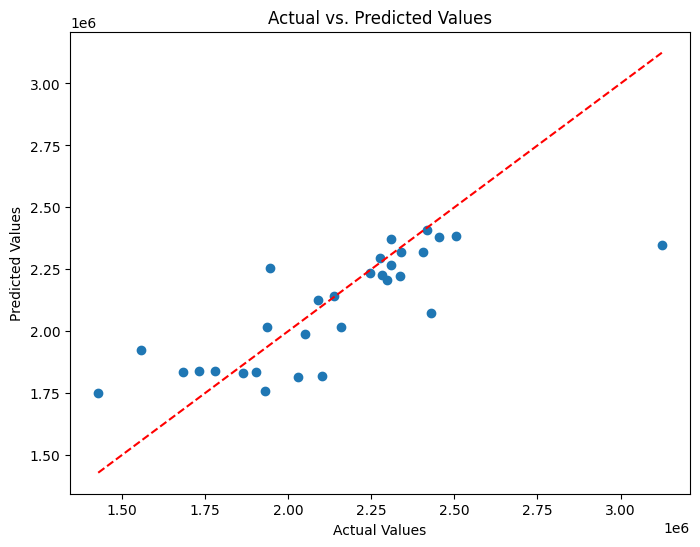

In [470]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Calculate R-squared value
r2_value = r2_score(y_test, y_pred)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='R-squared Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()



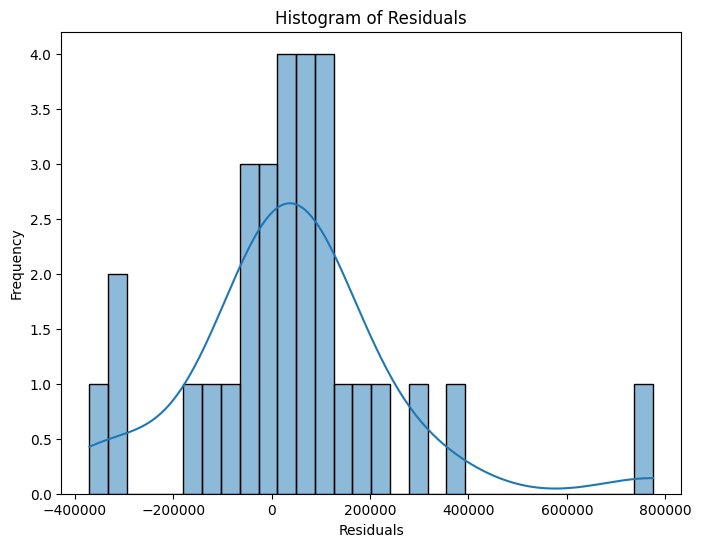

In [471]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


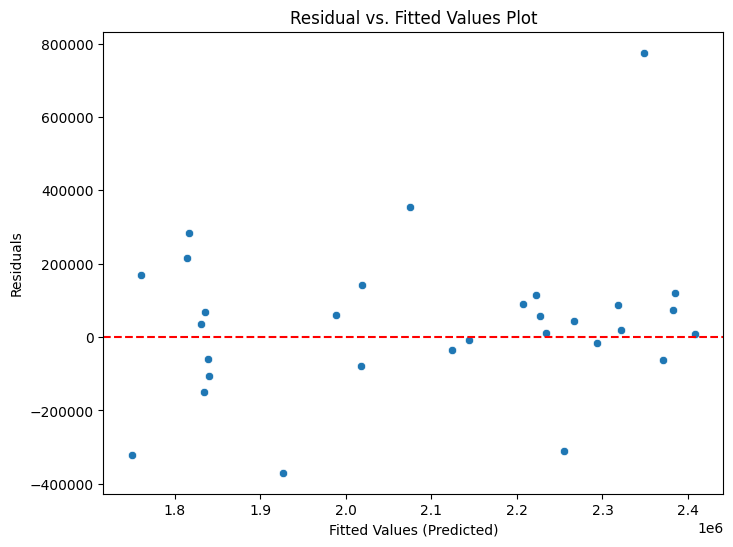

In [472]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate residuals
residuals = y_test - y_pred

# Plot Residual vs. Fitted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Values Plot')
plt.show()
